# Fullscan Renders
Outputting the graphs of the data collected by running the robot :) This data is just for viewing purposes, there is a separate notebook for testing the pathfinder modules.

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import pandas as pd

from mpl_toolkits import mplot3d
%matplotlib inline

In [21]:
path = os.path.abspath('..\\')
print("Available test files:")
file_itr = 0
while os.path.exists(path + "\\Scans\\test_%s.json" % file_itr):
    print("\t\\Scans\\test_%s.json" % file_itr)
    file_itr +=1
file_itr = 0
while os.path.exists(path + "\\Debugging Scripts\\test_%s.json" % file_itr):
    print("\t\\Debugging Scripts\\test_%s.json" % file_itr)
    file_itr +=1



Available test files:
	\Scans\test_0.json
	\Scans\test_1.json
	\Scans\test_2.json
	\Scans\test_3.json
	\Scans\test_4.json
	\Scans\test_5.json
	\Debugging Scripts\test_0.json
	\Debugging Scripts\test_1.json


In [55]:
debug_mode = True
save_figs = False
file_no = 4

if save_figs:
    plt.rcParams['figure.dpi'] = 500
else:
    plt.rcParams['figure.dpi'] = 200

In [56]:
current_file = r"\Debugging Scripts\test_%s.json" % file_no
# current_file = r"\Scans\test_%s.json" % file_no
path = os.path.abspath('..\\') + current_file

if debug_mode:
    print(path)

with open(path, 'r') as infile:
    json_data = json.load(infile)

r_o_m = json_data["range of motion"]
resolution = json_data["resolution"]
point_mags = json_data["points"]
max_point = json_data["max_point"]

if debug_mode:
    for i in json_data.keys():
        if i != "points":
            print(f"{i}: {json_data[i]}")
    # print(point_mags[0])
    # print(max_point)
    # print(resolution)
    # print(r_o_m)

c:\Users\ander\OneDrive - UW\Robotics lab material\Robotics Control Code\Ben's Control Code\Rebuilding_Everything\Debugging Scripts\test_4.json
range of motion: {'X': [0, 0], 'Y': [0, 0], 'Z': [-10.0, 6.0], 'Rx': [-50, 50], 'Ry': [-50, 50], 'Rz': [0, 0]}
resolution: [0.5, 2]
max_point: [[[0.0, 0.0, -1.5], [32.0, -28.0, 0.0]], 10]


In [57]:
# Zs = []
# Rxs = []
# Rys = []
# mags = []

# for p in point_mags:
#     Zs.append(p[0][0][2])
#     Rxs.append(p[0][1][0])
#     Rys.append(p[0][1][1])
#     mags.append(p[1])

# Gonna find the set of Rxs and Rys corresponding only to the Z value found at the max point
# Then do the same for the other guys
r = dict()
active_rom = []
for DoF in r_o_m:
    r[DoF] = (r_o_m[DoF][1] - r_o_m[DoF][0]) / 2
    if r[DoF] != 0.0:
        active_rom.append(DoF)

indeces = {'X': (0,0), 'Y': (0,1), 'Z': (0,2), 'Rx': (1,0), 'Ry': (1,1), 'Rz': (1,2)}
points = np.array([[p[0][indeces[a][0]][indeces[a][1]] for a in active_rom] for p in point_mags])
magss = np.array([[p[1] for p in point_mags]])
magss = magss.T

np_all = np.hstack((points,magss))

dat = pd.DataFrame(data = np_all, columns=["Z", "Rx","Ry","mag"])
mp = dat.loc[dat['mag'].idxmax()]
print(mp)

Z      -1.5
Rx     32.0
Ry    -28.0
mag    10.0
Name: 46319, dtype: float64


Maximum magnitude:  10.0
Minimum magnitude: -200.0
Median magnitude: -46.0


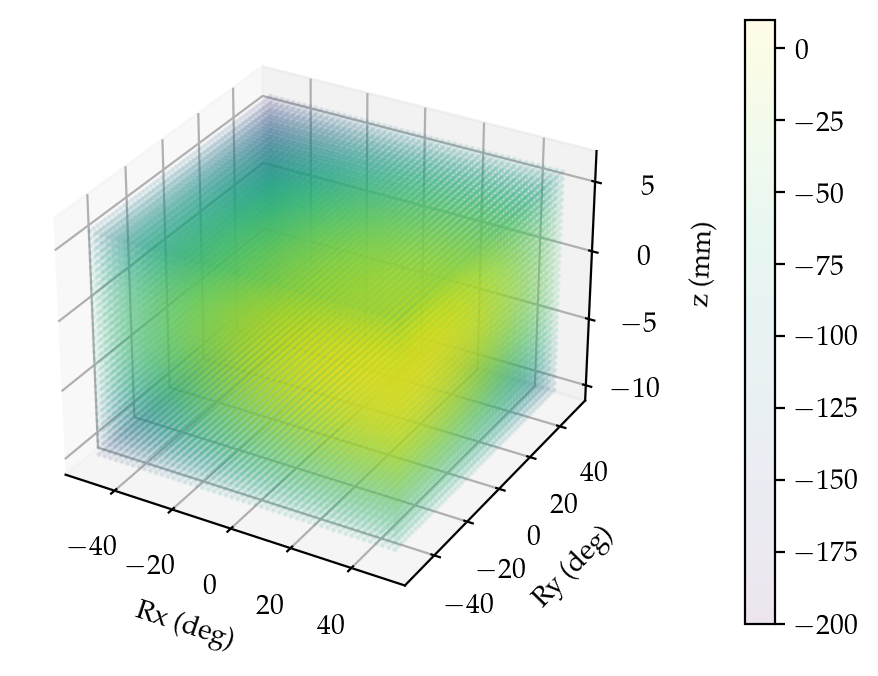

10.0


In [60]:
ax = plt.axes(projection='3d')

if debug_mode:
    print(f"Maximum magnitude:  {max(dat['mag'])}")
    print(f"Minimum magnitude: {min(dat['mag'])}")
    print(f"Median magnitude: {np.median(dat['mag'])}")

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

med = np.median(dat['mag'])
# dat2 = dat[np.all([dat['mag'] > med*1.3, dat['Ry'] > 5],axis=0)]
dat2 = dat[dat['mag'] > med*1.3]

# fig = ax.scatter(dat2['Rx'], dat2['Ry'], dat2['Z'], c=dat2['mag'], cmap='viridis', alpha=0.1,s=4)
fig = ax.scatter(dat['Rx'], dat['Ry'], dat['Z'], c=dat['mag'], cmap='viridis', alpha=0.1,s=1)

ax.set_xlabel("Rx (deg)")
ax.set_ylabel("Ry (deg)")
ax.set_zlabel("z (mm)")

plt.colorbar(fig, pad=0.13)
if save_figs:
    plt.savefig("fullscan_render_test_%s.jpg" % file_no, dpi=400)
plt.show()

print(max(dat['mag']))


In [61]:
# "mps" stands for "max points," or all the points in Rx/Ry space that occur at the max
# value of Z, rotated for each of the other dimensions
# mp = max_point[0]

zmps = dat[dat['Z'] == mp['Z']]
Rxmps = dat[dat['Rx'] == mp['Rx']]
Rymps = dat[dat['Ry'] == mp['Ry']]

if debug_mode:
    print(f"Active range of motion: {active_rom}")
    print(f"Shape of points array: {points.shape}")
    print(f"Shape of magnitudes array: {magss.shape} \n(Should be 1-D, same length as points array)")
    print(f"Tenth point_mag item (representative): {np_all[10]}")
    print(f"Testing the Z-max-points array:\n{zmps.head(4)}\n(Should be all the same as in the maxpoint)")
    print(f"Maximum point: {mp}")

Active range of motion: ['Z', 'Rx', 'Ry']
Shape of points array: (85833, 3)
Shape of magnitudes array: (85833, 1) 
(Should be 1-D, same length as points array)
Tenth point_mag item (representative): [ -10.  -50.  -30. -144.]
Testing the Z-max-points array:
         Z    Rx    Ry    mag
44217 -1.5 -50.0  50.0 -119.0
44218 -1.5 -50.0  48.0 -116.0
44219 -1.5 -50.0  46.0 -113.0
44220 -1.5 -50.0  44.0 -110.0
(Should be all the same as in the maxpoint)
Maximum point: Z      -1.5
Rx     32.0
Ry    -28.0
mag    10.0
Name: 46319, dtype: float64


In [62]:
# foo_isolated_mps refers to the points along the isolated foo axis when the other axes are at their optimal values
z_isolated_mps = dat[np.all([dat['Rx'] == mp['Rx'], dat['Ry'] == mp['Ry']],axis=0)]
Rx_isolated_mps = dat[np.all([dat['Z'] == mp['Z'], dat['Ry'] == mp['Ry']],axis=0)]
Ry_isolated_mps = dat[np.all([dat['Z'] == mp['Z'], dat['Rx'] == mp['Rx']],axis=0)]

if debug_mode:
    print(z_isolated_mps)
    # print(Rx_isolated_mps)
    # print(Ry_isolated_mps)
    pass

          Z    Rx    Ry   mag
2130  -10.0  32.0 -28.0 -71.0
4703   -9.5  32.0 -28.0 -62.0
7332   -9.0  32.0 -28.0 -54.0
9905   -8.5  32.0 -28.0 -46.0
12534  -8.0  32.0 -28.0 -39.0
15107  -7.5  32.0 -28.0 -32.0
17736  -7.0  32.0 -28.0 -26.0
20309  -6.5  32.0 -28.0 -20.0
22938  -6.0  32.0 -28.0 -15.0
25511  -5.5  32.0 -28.0 -10.0
28140  -5.0  32.0 -28.0  -6.0
30713  -4.5  32.0 -28.0  -2.0
33342  -4.0  32.0 -28.0   1.0
35915  -3.5  32.0 -28.0   4.0
38544  -3.0  32.0 -28.0   6.0
41117  -2.5  32.0 -28.0   8.0
43746  -2.0  32.0 -28.0   9.0
46319  -1.5  32.0 -28.0  10.0
48948  -1.0  32.0 -28.0  10.0
51521  -0.5  32.0 -28.0  10.0
54150   0.0  32.0 -28.0   9.0
56723   0.5  32.0 -28.0   8.0
59352   1.0  32.0 -28.0   6.0
61925   1.5  32.0 -28.0   4.0
64554   2.0  32.0 -28.0   1.0
67127   2.5  32.0 -28.0  -2.0
69756   3.0  32.0 -28.0  -6.0
72329   3.5  32.0 -28.0 -10.0
74958   4.0  32.0 -28.0 -15.0
77531   4.5  32.0 -28.0 -20.0
80160   5.0  32.0 -28.0 -26.0
82733   5.5  32.0 -28.0 -32.0
85362   6.

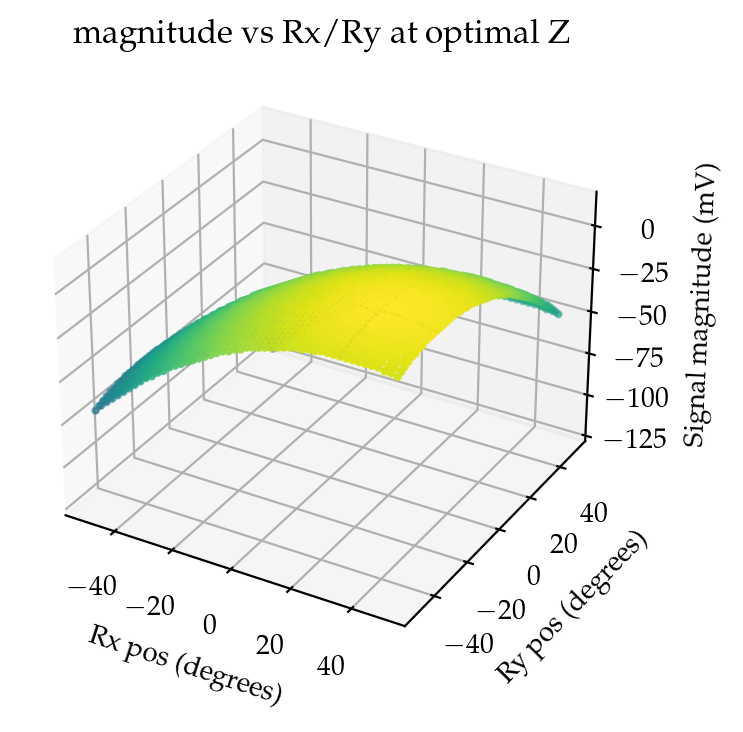

In [63]:
# fig2 = plt.figure(figsize=(14,4), constrained_layout=True)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

# tax = fig2.add_subplot(1,3,1, projection='3d')
tax = plt.axes(projection='3d')
tax.scatter3D(zmps['Rx'], zmps['Ry'], zmps['mag'],c=zmps['mag'], cmap='viridis',s=4)
tax.plot3D(Rx_isolated_mps['Rx'], Rx_isolated_mps['Ry'], Rx_isolated_mps['mag'], c='g')
tax.plot3D(Ry_isolated_mps['Rx'], Ry_isolated_mps['Ry'], Ry_isolated_mps['mag'], c='b')
tax.set_title("magnitude vs Rx/Ry at optimal Z")
tax.set_xlabel("Rx pos (degrees)")
tax.set_ylabel("Ry pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

# tax = fig2.add_subplot(1,3,2, projection='3d')
# # tax.plot_trisurf(Rxmps[:,0], Rxmps[:,2], Rxmps[:,3], cmap='viridis')
# tax.scatter(Rxmps['Z'], Rxmps['Ry'], Rxmps['mag'],c=Rxmps['mag'], cmap='viridis')
# # tax.plot3D(z_isolated_mps[:,0], z_isolated_mps[:,2], z_isolated_mps[:,3], c='r')
# # tax.plot3D(Ry_isolated_mps[:,0], Ry_isolated_mps[:,2], Ry_isolated_mps[:,3], c='b')
# tax.set_title("magnitude vs Z/Ry at optimal Rx")
# tax.set_xlabel("Z pos (mm)")
# tax.set_ylabel("Ry pos (degrees)")
# tax.set_zlabel("Signal magnitude (mV)")

# tax = fig2.add_subplot(1,3,3, projection='3d')
# # tax.plot_trisurf(Rymps[:,0], Rymps[:,1], Rymps[:,3], cmap='viridis')
# tax.scatter(Rymps['Z'], Rymps['Rx'], Rymps['mag'],c=Rymps['mag'], cmap='viridis')
# # tax.plot3D(z_isolated_mps[:,0], z_isolated_mps[:,1], z_isolated_mps[:,3], c='r')
# # tax.plot3D(Rx_isolated_mps[:,0], Rx_isolated_mps[:,1], Rx_isolated_mps[:,3], c='g')
# tax.set_title("magnitude vs Z/Rx at optimal Ry")
# tax.set_xlabel("Z pos (degrees)")
# tax.set_ylabel("Rx pos (degrees)")
# tax.set_zlabel("Signal magnitude (mV)")

plt.show()

Text(0.5, 0, 'Signal magnitude (mV)')

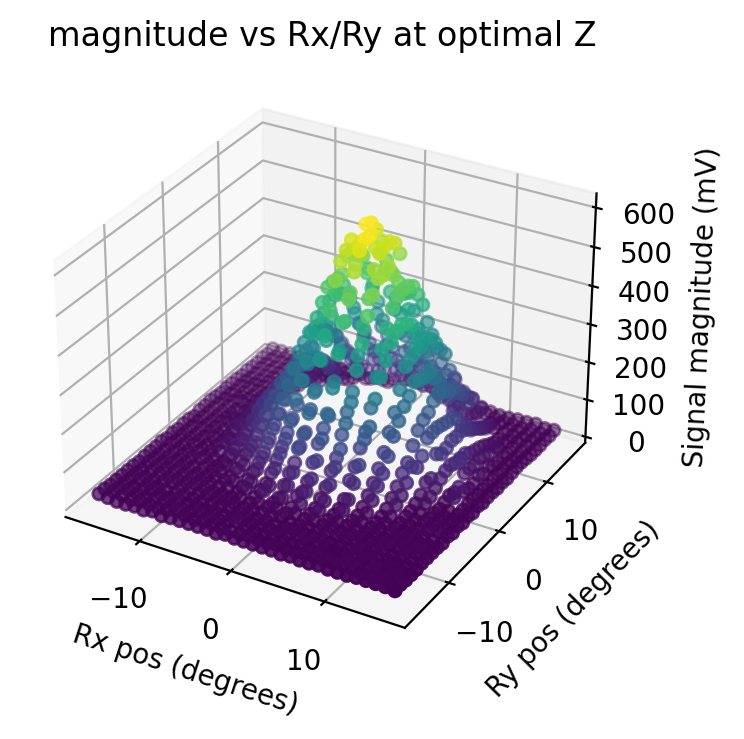

In [ ]:
tax = plt.axes(projection="3d")

tax.scatter3D(zmps['Rx'], zmps['Ry'], zmps['mag'],c=zmps['mag'], cmap='viridis')
# tax.plot3D(Rx_isolated_mps[:,1], Rx_isolated_mps[:,2], Rx_isolated_mps[:,3], c='g')
# tax.plot3D(Ry_isolated_mps[:,1], Ry_isolated_mps[:,2], Ry_isolated_mps[:,3], c='b')
tax.set_title("magnitude vs Rx/Ry at optimal Z")
tax.set_xlabel("Rx pos (degrees)")
tax.set_ylabel("Ry pos (degrees)")
tax.set_zlabel("Signal magnitude (mV)")

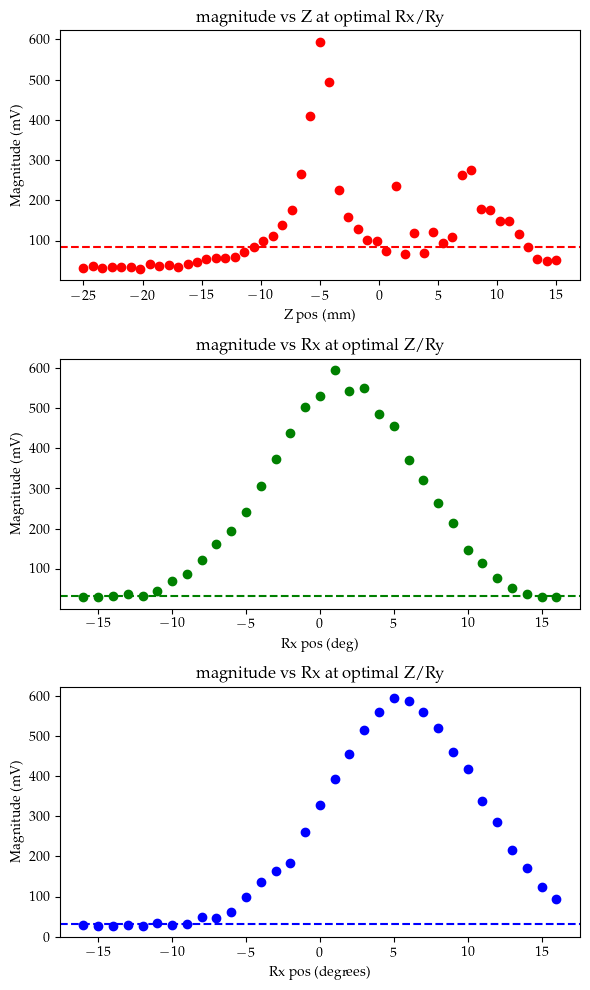

In [38]:
fig3 = plt.figure(figsize=(6,10), dpi=100)
# plt.subplots_adjust(left=0.1,
#                     bottom=0.1, 
#                     right=0.9, 
#                     top=0.9, 
#                     wspace=0.8, 
#                     hspace=0.4)

tax = fig3.add_subplot(311)
tax.scatter(z_isolated_mps['Z'],z_isolated_mps['mag'], c='r')
tax.axhline(np.median(z_isolated_mps['mag']), c='r',ls='--')
# tax.axhline(np.median(dat['mag']), c='r',ls='--')
tax.set_title("magnitude vs Z at optimal Rx/Ry")
tax.set_xlabel("Z pos (mm)")
tax.set_ylabel("Magnitude (mV)")

tax = fig3.add_subplot(312)
tax.scatter(Rx_isolated_mps['Rx'],Rx_isolated_mps['mag'], c='g')
tax.axhline(np.median(dat['mag']), c='g',ls='--')
tax.set_title("magnitude vs Rx at optimal Z/Ry") 
tax.set_xlabel("Rx pos (deg)")
tax.set_ylabel("Magnitude (mV)")

tax = fig3.add_subplot(313)
tax.scatter(Ry_isolated_mps['Ry'],Ry_isolated_mps['mag'], c='b')
tax.axhline(np.median(dat['mag']), c='b',ls='--')
tax.set_title("magnitude vs Rx at optimal Z/Ry")
tax.set_xlabel("Rx pos (degrees)")
tax.set_ylabel("Magnitude (mV)")

fig3.tight_layout()

[ 7.73237085e+03 -6.72186385e+00  5.31627247e+00  1.23210022e+01]


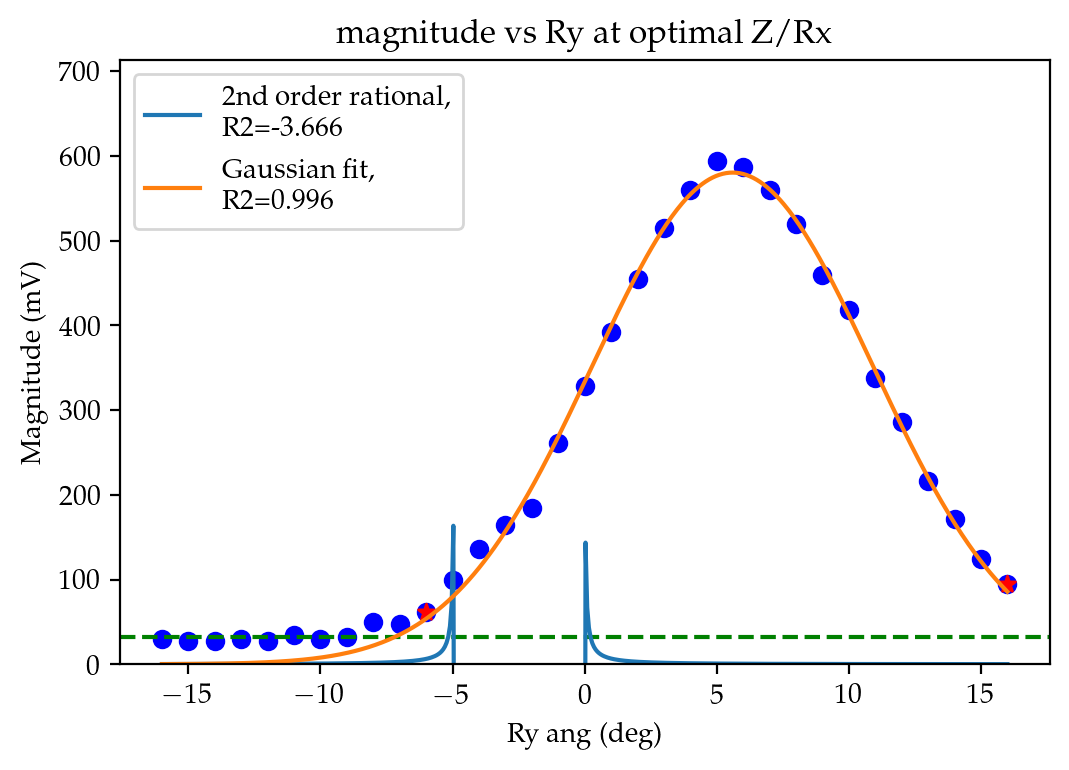

In [50]:
from scipy.optimize import curve_fit

fig4 = plt.axes()
fig4.get_figure().dpi=200


interpolation_windows= { \
    "Z": [15,32], \
    "Rx": [5,29], \
    "Ry": [10,32]}

t = {'Z': (z_isolated_mps, 'r', np.median(z_isolated_mps['mag']), 'g', \
    'magnitude vs Z at optimal Rx/Ry', "Z pos (mm)"), \
    'Rx': (Rx_isolated_mps, 'g', np.median(Rx_isolated_mps['mag']), 'b', \
    'magnitude vs Rx at optimal Z/Ry', "Rx ang (deg)"), \
    'Ry': (Ry_isolated_mps, 'b', np.median(Ry_isolated_mps['mag']), 'r', \
    'magnitude vs Ry at optimal Z/Rx', "Ry ang (deg)")}

b = "Ry"
a = interpolation_windows[b]

fig4.scatter(t[b][0][b],t[b][0]['mag'], c=t[b][1])
fig4.scatter(t[b][0].reset_index()[b][a],t[b][0].reset_index()['mag'][a], c=t[b][3], marker='*')
fig4.axhline(np.median(dat['mag']), c='g',ls='--')

fig4.set_title(t[b][4])
fig4.set_xlabel(t[b][5])
fig4.set_ylabel("Magnitude (mV)")

def func(x, a, b, c):
    return (a*(x**2)) + (b*x) + c

def func1(x,a,b,c,d):
    return (d/((a*(x**2)) + (b*x) + c))

def func2(x,a,b,s,m):
    return (a / (s * np.sqrt(2 * np.pi))) * (np.e)**(-0.5 * (((x-b) - m)/s)**2)

# x = np.linspace(t[b][0].reset_index()[b][a[0]],t[b][0].reset_index()[b][a[1]])
x = np.linspace(t[b][0][b].reset_index()[b][0],max(t[b][0][b].reset_index()[b]),500)
# print(t[b][0].reset_index()[b][a[0]:a[1]])

# popt, pcov = curve_fit(func, t[b][0].reset_index()[b][a[0]:a[1]], t[b][0].reset_index()['mag'][a[0]:a[1]])
# fig4.plot(x, func(x, *popt), label="2nd order poly fit")

x_data = t[b][0].reset_index()[b][a[0]:a[1]]
y_data = t[b][0].reset_index()['mag'][a[0]:a[1]]

def r_squared(func, popt, x_dat, y_dat):
    residuals = y_dat - func(x_dat, *popt)
    ss_res = np.sum(residuals**2)

    ss_tot = np.sum((y_dat - np.mean(y_dat))**2)

    return 1 - (ss_res/ss_tot)


popt, pcov = curve_fit(func1, x_data, y_data)
fig4.plot(x, func1(x, *popt), label=f"2nd order rational,\n R2={r_squared(func1, popt, x_data, y_data):0.3f}")
popt, pcov = curve_fit(func2, x_data, y_data)
fig4.plot(x, func2(x, *popt), label=f"Gaussian fit,\n R2={r_squared(func2, popt, x_data, y_data):0.3f}")

print(popt)
# print(func(x, *popt))

# fig4.legend(bbox_to_anchor=(1.56, 1.023))
fig4.legend()
fig4.set_ybound([0, t[b][0]['mag'].max() * 1.2])

# odr.polynomial?